# 📈 Logistic Regression with Custom Preprocessing
This notebook contains a hands-on implementation of **Logistic Regression** for binary classification, based on a banking dataset.

### ✍️ Author Note
I created this project a few months back while learning the fundamentals of ML pipelines.
It covers:
- One-hot encoding without `pd.get_dummies`
- Balancing classes using `SMOTE`
- Data normalization
- Splitting into train/test sets

**Inspired by projects and concepts from Karpathy and Andrew Ng.**

In [2]:
#imorting the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\kulwant dhillon\Downloads\bank refined.csv")

# Separate target and features
y = data[['y']]
x = data[['age', 'job', 'marital', 'education', 'housing', 'loan', 'balance', 'day', 'duration', 'campaign', 'previous']]

# Categorical columns to encode
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan']

# Initialize an empty list to store one-hot encoded arrays
one_hot_encoded_list = []

# Perform one-hot encoding for each categorical column
for col in categorical_columns:
    # Step 1: Map categories to integers
    categories = x[col].unique()
    category_to_int = {category: i for i, category in enumerate(categories)}
    x.loc[:, col + '_encoded'] = x[col].map(category_to_int)  # Use .loc to avoid SettingWithCopyWarning
    
    # Step 2: Create one-hot encoded matrix using np.eye
    num_categories = len(categories)
    one_hot_encoded = np.eye(num_categories)[x[col + '_encoded']]
    
    # Append the one-hot encoded matrix to the list
    one_hot_encoded_list.append(one_hot_encoded)

# Step 3: Combine all one-hot encoded arrays
X_encoded = np.hstack(one_hot_encoded_list)

# Step 4: Combine encoded categorical features with numerical features
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
X_numerical = x[numerical_columns].values
X_processed = np.hstack((X_numerical, X_encoded))

# Split the data into training and testing sets
x_train = X_processed[0:4000]
x_test = X_processed[4000:]
y_train = y.iloc[0:4000].values
y_test = y.iloc[4000:].values

# Display the processed data
print("Processed Features Shape:", X_processed.shape)
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

Processed Features Shape: (4521, 29)
x_train Shape: (4000, 29)
x_test Shape: (521, 29)
y_train Shape: (4000, 1)
y_test Shape: (521, 1)


C:\Users\kulwant dhillon\AppData\Local\Temp\ipykernel_80692\2977923072.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, col + '_encoded'] = x[col].map(category_to_int)  # Use .loc to avoid SettingWithCopyWarning


In [21]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check new class distribution
import numpy as np
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))


AttributeError: 'NoneType' object has no attribute 'split'

In [22]:
print(y_train)

[['no']
 ['no']
 ['no']
 ...
 ['no']
 ['no']
 ['no']]


In [509]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std  # Use train mean & std for test normalization


In [510]:
#sigmoid function(0-1)
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [511]:
#collecting the maximum likelihood
def cost(x_train, y_train, w, b, lamda_):
    m = len(x_train)
    total_cost = 0
    for i in range(m):
        z = np.dot(x_train[i],w) + b
        f_wb = sigmoid(z)
        total_cost += -y_train[i] * np.log(f_wb) - (1-y_train[i]) * np.log(1-f_wb)
    total_cost /= m
    #regularization
    reg = (lamda_ / (2 * m)) * np.sum(w**2)
    total_cost 
    return total_cost

In [512]:
#collecting gradient
def diff(x_train, y_train, w, b, lamda_):
    m = len(x_train)
    dw = np.zeros_like(w)
    db = 0
    for i in range(m):
        z = np.dot(x_train[i],w) + b
        z = sigmoid(z)
        dw += np.sum(z-y_train[i])*x_train[i]
        db += np.sum(z-y_train[i])
    dw /= m
    #regularization
    reg = (lamda_ /m)*w
    dw += reg
    db /= m
    return dw,db        

In [513]:
#gradient descent(optimization)
def gradient(x_train, y_train, w, b, cost, diff, iterations, lamda_, alpha):
    tc = []
    for i in range(iterations):
        dw, db = diff(x_train, y_train, w, b, lamda_)
        w = w - alpha * dw
        b = b - alpha * db
        if i%100 == 0:
            total_cost = cost(x_train, y_train, w, b, lamda_)
            tc.append(total_cost)
            print(f"iteration {i} : cost {total_cost}")
    return w,b,tc        

In [514]:
#parameters, learning rate, iterations(for training set) 
m,n = x_train.shape
w = np.ones(n)*1
b = 0
alpha = 1e-7 #learning rate

lamda_ = 0.1
iterations = 1000

w,b,costs = gradient(x_train, y_train, w, b, cost, diff, iterations, lamda_, alpha)
print(m,n)
print(costs)

iteration 0 : cost 1.5049034110454411
iteration 100 : cost 1.5049009113057297
iteration 200 : cost 1.5048984115684918
iteration 300 : cost 1.5048959118378804
iteration 400 : cost 1.504893412109081
iteration 500 : cost 1.5048909123587455
iteration 600 : cost 1.5048884126387707
iteration 700 : cost 1.504885912922489
iteration 800 : cost 1.5048834132105866
iteration 900 : cost 1.5048809135027366
4000 26
[1.5049034110454411, 1.5049009113057297, 1.5048984115684918, 1.5048959118378804, 1.504893412109081, 1.5048909123587455, 1.5048884126387707, 1.504885912922489, 1.5048834132105866, 1.5048809135027366]


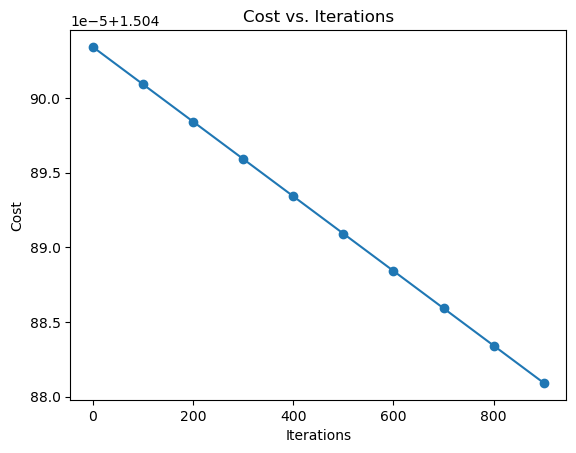

In [515]:
#visualizations
plt.plot(range(0, iterations, 100), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [516]:
#parameters, learning rate, iterations(for testing set) 
m,n = x_test.shape
w = np.zeros(n) *1
b = 0
alpha = 1e-7 #learning rate

lamda_ = 0.1
iterations = 2000

w,b,costs = gradient(x_test, y_test, w, b, cost, diff, iterations, lamda_, alpha)
print(f'm, n: {m},{n}')

iteration 0 : cost 0.6931471631869007
iteration 100 : cost 0.6931454258871752
iteration 200 : cost 0.693143688596881
iteration 300 : cost 0.6931419513160201
iteration 400 : cost 0.6931402140445891
iteration 500 : cost 0.6931384767825904
iteration 600 : cost 0.6931367395300241
iteration 700 : cost 0.6931350022868897
iteration 800 : cost 0.6931332650531844
iteration 900 : cost 0.6931315278289133
iteration 1000 : cost 0.6931297906140719
iteration 1100 : cost 0.6931280534086619
iteration 1200 : cost 0.6931263162126842
iteration 1300 : cost 0.6931245790261363
iteration 1400 : cost 0.6931228418490208
iteration 1500 : cost 0.6931211046813357
iteration 1600 : cost 0.6931193675230831
iteration 1700 : cost 0.6931176303742586
iteration 1800 : cost 0.6931158932348678
iteration 1900 : cost 0.6931141561049072
m, n: 521,26


In [517]:
 # Should match


In [518]:
from sklearn.metrics import accuracy_score

# Compute sigmoid predictions (element-wise)
z = np.dot(x_train, w) + b
f_wb = sigmoid(z)  # This should be a NumPy array, not a single value

# Convert probabilities to binary labels (0 or 1)
y_pred = (f_wb >= 0.5).astype(int)
print(f_wb.shape, y_train.shape) 
print("Accuracy:", classification_report(y_train, y_pred))
# Compute accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

(4000,) (4000,)
Accuracy:               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3542
           1       0.44      0.18      0.26       458

    accuracy                           0.88      4000
   macro avg       0.67      0.58      0.60      4000
weighted avg       0.85      0.88      0.86      4000

Model Accuracy: 0.88


In [519]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[3436  106]
 [ 374   84]]


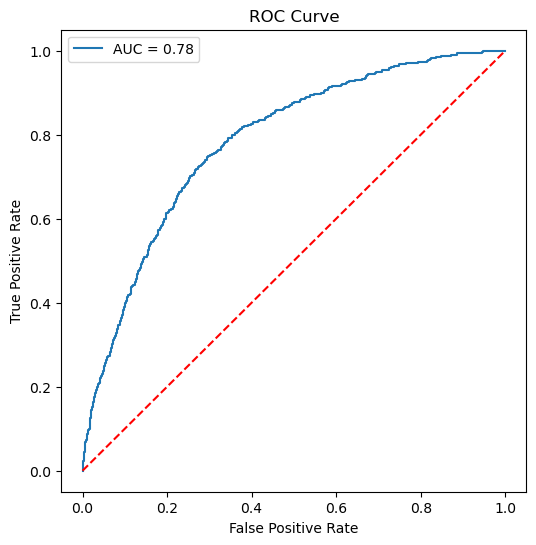

Accuracy:               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3542
           1       0.44      0.18      0.26       458

    accuracy                           0.88      4000
   macro avg       0.67      0.58      0.60      4000
weighted avg       0.85      0.88      0.86      4000



In [520]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_train, f_wb)

# Compute AUC (Area Under Curve)
auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("Accuracy:", classification_report(y_train, y_pred))

In [521]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Mean after scaling:", np.mean(x_train, axis=0))
print("Std after scaling:", np.std(x_train, axis=0))  # Should be ~1 for all features


Mean after scaling: [-8.88178420e-18 -5.32907052e-18 -1.55431223e-17  6.66133815e-18
 -1.77635684e-18  8.88178420e-18  8.88178420e-18 -8.88178420e-19
 -7.10542736e-18 -3.50830476e-17 -8.88178420e-19  1.24344979e-17
  8.88178420e-18 -4.44089210e-19 -1.77635684e-17 -4.35207426e-17
  1.95399252e-17 -2.84217094e-17  4.08562073e-17 -6.66133815e-18
 -3.46389584e-17  5.32907052e-18  2.22044605e-17  1.24344979e-17
 -1.03028697e-16  1.77635684e-18]
Std after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [522]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train, random_state=42)


In [523]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [524]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
print("Decision Tree Accuracy:", model.score(x_test, y_test))


Decision Tree Accuracy: 0.8195777351247601


In [525]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

print("Accuracy:", classification_report(y_test, y_pred))



Accuracy:               precision    recall  f1-score   support

           0       0.96      0.79      0.87       458
           1       0.34      0.76      0.47        63

    accuracy                           0.79       521
   macro avg       0.65      0.78      0.67       521
weighted avg       0.88      0.79      0.82       521



In [526]:
print(np.isnan(x_train).sum())  # Should be 0
print(np.isinf(x_train).sum())  # Should be 0
print(np.isnan(y_train).sum())  # Should be 0


0
0
0


In [527]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(x_train, y_train)
print("Accuracy:", classification_report(y_test, y_pred))


Accuracy:               precision    recall  f1-score   support

           0       0.96      0.79      0.87       458
           1       0.34      0.76      0.47        63

    accuracy                           0.79       521
   macro avg       0.65      0.78      0.67       521
weighted avg       0.88      0.79      0.82       521



In [536]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:15
   ---------------------------------------- 1.3/124.9 MB 8.2 MB/s eta 0:00:16
    --------------------------------------- 2.6/124.9 MB 12.7 MB/s eta 0:00:10
   - -------------------------------------- 4.2/124.9 MB 16.6 MB/s eta 0:00:08
   - -------------------------------------- 5.8/124.9 MB 18.6 MB/s eta 0:00:07
   -- ------------------------------------- 7.5/124.9 MB 21.7 MB/s eta 0:00:06
   -- ------------------------------------- 9.0/124.9 MB 22.9 MB/s eta 0:00:06
   --- ------------------------------------ 10.8/124.9 MB 34.4 MB/s eta 0:00:04
   ---- ----------------------------------- 12.6/124.9 MB 36.3 MB/s eta 0:00:04
   ---- ----------------------------------- 14.7/124.9 MB 38.6 MB/s

In [543]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(x_train, y_train)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(class_weight="balanced"), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best Params:", grid.best_params_)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=100)
xgb.fit(x_train, y_train)

dt_model = DecisionTreeClassifier(class_weight={0: 1, 1: 3}, random_state=42)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)
print("Updated Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", classification_report(y_test, y_pred))

Best Params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Updated Decision Tree Accuracy: 0.8330134357005758
Accuracy:               precision    recall  f1-score   support

           0       0.92      0.92      0.92       458
           1       0.43      0.41      0.42        63

    accuracy                           0.86       521
   macro avg       0.67      0.67      0.67       521
weighted avg       0.86      0.86      0.86       521



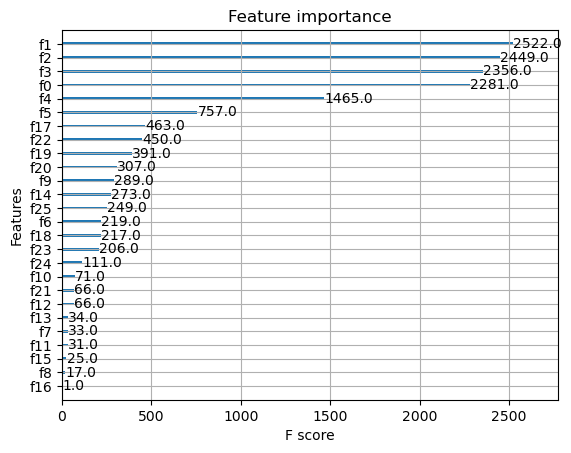

In [544]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.show()


In [529]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Mean after scaling:", np.mean(x_train, axis=0))
print("Std after scaling:", np.std(x_train, axis=0))  # Should be ~1 for all features


Mean after scaling: [ 4.30673754e-17  3.28177162e-17 -2.00996757e-17 -6.86421558e-16
 -1.91847291e-15 -1.01603273e-15  1.41493881e-15  4.17705741e-15
  1.56722618e-17  2.74640715e-16  9.34851983e-15  7.66310912e-16
  8.56363728e-16 -2.12359931e-15  4.89256668e-16  1.76930432e-15
  3.40461080e-15 -4.34195311e-15  4.51596223e-16  9.46259822e-16
  2.34519725e-15  2.04448573e-15  5.56921659e-15 -1.09301645e-14
  4.48477443e-16 -8.79655844e-15]
Std after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
Updated Decision Tree Accuracy: 0.8330134357005758
Accuracy:               precision    recall  f1-score   support

           0       0.92      0.93      0.93       458
           1       0.46      0.44      0.45        63

    accuracy                           0.87       521
   macro avg       0.69      0.69      0.69       521
weighted avg       0.87      0.87      0.87       521
